In [1]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import math

plt.rcParams['figure.figsize'] = (5, 4)
pd.set_option('display.max_columns', None)
%matplotlib inline

In [5]:
df = pd.read_csv('Datasets/FyntraCustomerData.csv')

df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


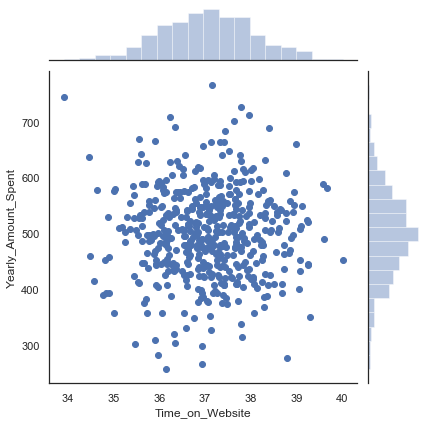

In [23]:
sns.set_style('white')
sns.jointplot(data=df, x='Time_on_Website', y='Yearly_Amount_Spent');

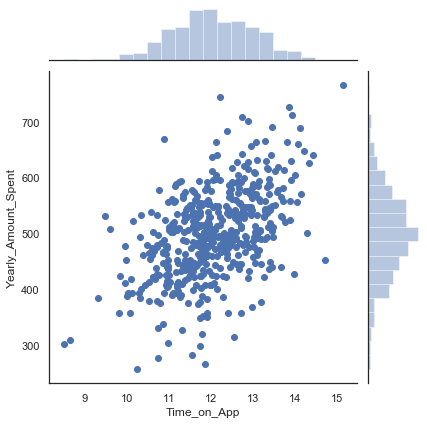

In [24]:
sns.jointplot(data=df, x='Time_on_App', y='Yearly_Amount_Spent');

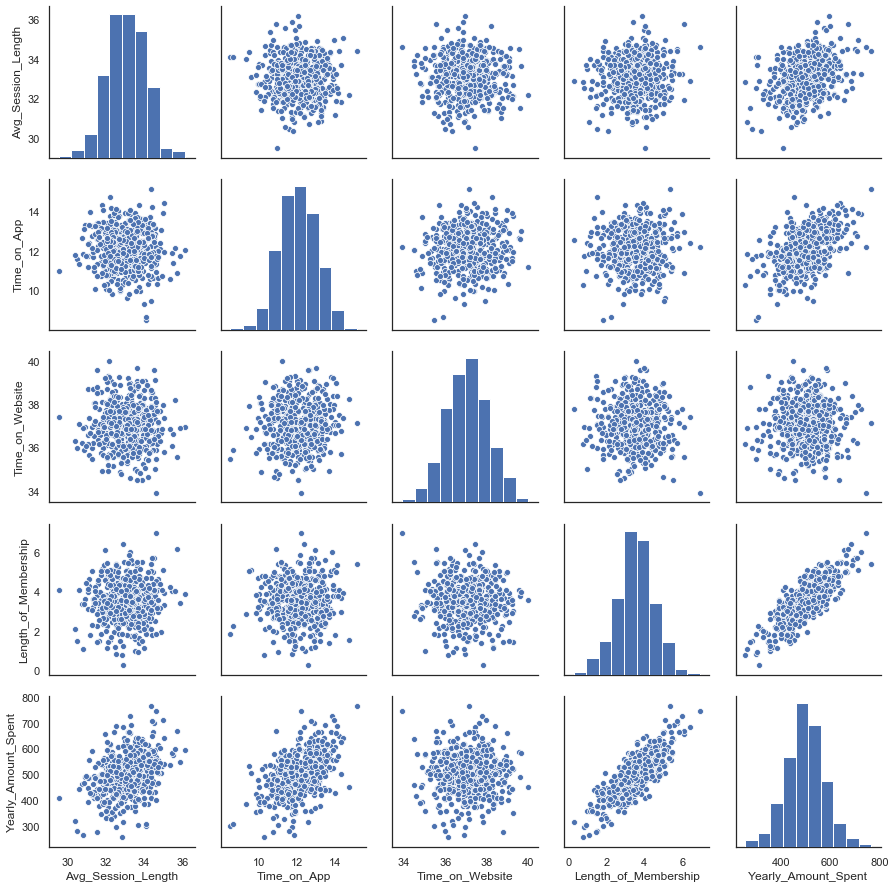

In [27]:
sns.pairplot(df);

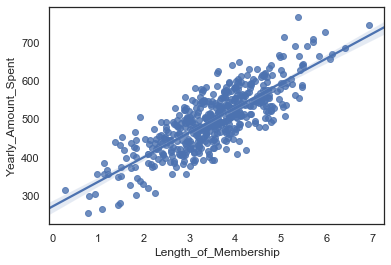

In [30]:
sns.regplot(data=df, x='Length_of_Membership', y='Yearly_Amount_Spent');

In [38]:
X = df.iloc[:, 3:7]
y = df.iloc[:, -1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85)

In [43]:
LR_model = LinearRegression()

LR_model.fit(X_train, y_train);

In [44]:
y_pred = LR_model.predict(X_test)

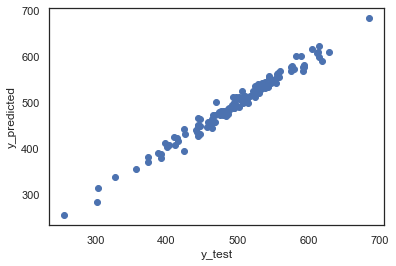

In [46]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_predicted');

In [52]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'Root Mean Square Error: {rmse}')

Root Mean Square Error: 10.320122650211061


In [55]:
weights = list(LR_model.coef_)

In [58]:
features = list(X_train.columns)

In [60]:
for f, w in zip(features, weights):
    print(f'Feature {f}, weight {w:.2f}\n')

Feature Avg_Session_Length, weight 25.89

Feature Time_on_App, weight 39.11

Feature Time_on_Website, weight 0.52

Feature Length_of_Membership, weight 61.36



As per coefficient, Company should focus on App rather than Websites because it has more weightage